__Anirudh Singh Shaktawat__                                                                                                     
MS (Computer Engineering)                                                                                                       
Texas A&M University                                                                                                             (email: anirudhshaktawat1@gmail.com)

# Introduction: Titanic- Machine Learning from Disaster
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. 

The challenge is to complete the analysis of what sorts of people were likely to survive. This is an online machine learning challenge hosted by Kaggle. The objective of this notebook is to apply the tools of machine learning to predict which passengers survived the tragedy. This is a standard supervised classification task:
- __Supervised:__ The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
- __Classification:__ The label is a binary variable, 0 (not survived the tragedy), 1 (survived the tragedy)

The __evaluation metric__ for this problem is 'accuracy', i.e. how many of our predictions are correct.

## Data
The data is taken from the kaggle's titanic competition website. The data contains features and labels-

- __Features:__ Passenger Id, Passenger Class, Passenger Name, Passenger Gender, Passenger Age, No. of Siblings, spouse, parent and children related to passenger on-board, Passenger Ticket, Ticket's Fare, Passenger Cabin, Embarked (location on the ship)
- __Label:__ Survived


## Imports

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for plotting/visualising the distibution of data
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import tools

import random
import re

# for pre-processing of the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings

## Read in data

In [2]:
# load the data
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get the distribution of the data
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Molson, Mr. Harry Markland",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Explorartory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

## Examine the Distribution of the 'Survived' Column

The survival is what we are asked to predict: either a 0 for the person who will not survive, or a 1 indicating the person will survive the tragedy. We can first examine the number of passengers falling into each category.

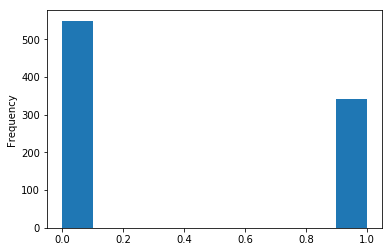

In [5]:
train_df['Survived'].astype(int).plot.hist();

From this information, we can consider this problem as a balanced class problem.

## Examine Missing Values

Next we can look at the number and percentage of missing values in each column. 

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
missing_values = missing_values_table(train_df)
missing_values

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


When it comes to building our machine learning models, we will have to fill in these missing values (known as imputation). Also, there are some models available such as LightGBM, XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, which do not have high feature importance or high correlation with the labels.

Since, Embarked column has very few number of missing values, only 2, we can impute it with the mode of the column. It will not affect the overall distribution of the column. 

In [8]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

## Feature Engineering
  

Passenger Name is a categorical variable and it is obviously unique for each passenger. So we cannot use the Name variable directly in our model but we can extract some useful information from this variable like a new feature called 'Title' which can guide our model. 

In [9]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
train_df['Title'] = train_df['Name'].apply(get_title)
test_df['Title'] = test_df['Name'].apply(get_title)

In [10]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Jonkheer      1
Mme           1
Ms            1
Capt          1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [11]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

From this information, we see that some titles are very rare, so we will combine these titles under a single name - 'Others'

In [12]:
dict1 = {'Dr':'Others', 'Rev':'Others', 'Col':'Others', 'Mlle':'Others', 'Major':'Others', 'Capt':'Others', 'Ms':'Others', 
         'Don':'Others', 'Lady':'Others', 'Countess':'Others', 'Jonkheer':'Others', 'Mme':'Others', 'Sir':'Others'}
train_df['Title'] = train_df['Title'].replace(dict1)

dict2 = {'Col':'Others', 'Rev':'Others', 'Ms':'Others', 'Dona':'Others', 'Dr':'Others'}
test_df['Title'] = test_df['Title'].replace(dict2)

In [13]:
train_df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

From this information of titles, we can see that there are 5 classes. Leaving out the others, 'Miss' and 'Mrs' titles are used for females and the only information that we can get from these 2 titles is that there are 125 females (Mrs) who are married and 182 females (Miss) are not married. 'Mr' and 'Master' titles are used for males. Master is used for children (people with age less than 13). This means that there are 40 male children (age less than 13) and 517 males with age greater than 13.    

## Correction in the data
If there is any male with age less than 13 and having a title of Mr, then that is incorrect entry and we need to correct the title, changing it to Master. Although, there is only one incorrect entry in our data of this type and changing it will not make much impact, but Data correction is an important step in building a machine learning model.  

In [14]:
# Checking the incorrect entry when age is less than 13 for male and the title is Mr.
df = train_df.loc[train_df['Title']=='Mr']
df = df.loc[df['Age']<13]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,Mr


In [15]:
# Correcting the entry
train_df.loc[[731],['Title']] = 'Master'

## Visualise the variables by plotting the classes on a graph

In [16]:
# Function to plot the classes of the variables
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def get_percent(df, temp_col, width=800, height=500):
    cnt_srs = df[[temp_col, 'Survived']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

    trace = go.Bar(
        x = cnt_srs[temp_col].values[::-1],
        y = cnt_srs['Survived'].values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        name = "Percent",
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

def get_count(df, temp_col, width=800, height=500):
    cnt_srs = df[temp_col].value_counts().sort_index()

    trace = go.Bar(
        x = cnt_srs.index[::-1],
        y = cnt_srs.values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=0,
            color='rgb(0, 0, 0)'
        ),
        name = 'Count',
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

def plot_count_percent_for_object(df, temp_col, height=400):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% Survived')
    fig['layout'].update(title = temp_col, margin=dict(l=100), width=800, height=height, showlegend=False)

    py.iplot(fig)

In [17]:
# observe the distribution of title
temp_col = train_df.columns.values[12]
plot_count_percent_for_object(train_df, temp_col)

From this information, we can observe that Age (Mr vs Master), Family/relationship status (Mrs vs Miss), Gender/Sex (Mr vs Mrs) variables play reasonable role in the survival of the passenger.

In [18]:
# observe the distribution of Sex
temp_col = train_df.columns.values[4]
plot_count_percent_for_object(train_df, temp_col)

There are 2 features in our dataset- 'SibSp' gives the information about the sibling or spouse of the passenger onboard and 'Parch' gives information about the parents and children of the passenger onboard. But both these variables basically indicate the family information of passenger onboard. So we will combine these 2 variables into one variable 'family'.  

In [19]:
# Making a new variable/feature 'family'
train_df['family'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

test_df['family'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [20]:
# observe the distribution of family
temp_col = train_df.columns.values[11]
plot_count_percent_for_object(train_df, temp_col)

From this information, we can see that there are many passengers who do not have any family member onboard. This directs us to make another variable called 'family_status' which will tell us whether the passenger was alone on the ship or with some family member (not alone).  

In [21]:
# Making a new variable/feature 'family_status' from the variable 'family' 
train_df['family_status'] = train_df['family']
test_df['family_status'] = test_df['family']
dict2 = {1:'Alone', 2:'NotAlone', 3:'NotAlone', 4:'NotAlone', 5:'NotAlone', 6:'NotAlone', 7:'NotAlone', 8:'NotAlone', 
         9:'NotAlone', 10:'NotAlone', 11:'NotAlone'}
train_df['family_status'] = train_df['family_status'].replace(dict2)
test_df['family_status'] = test_df['family_status'].replace(dict2)

In [22]:
# observe the distribution of family_status
temp_col = train_df.columns.values[12]
plot_count_percent_for_object(train_df, temp_col)

Now let's observe the distribution of Age. Age is a continuous variable with float data type. So, let's first plot the KDE (kernel distribution estimation) plot for age.   

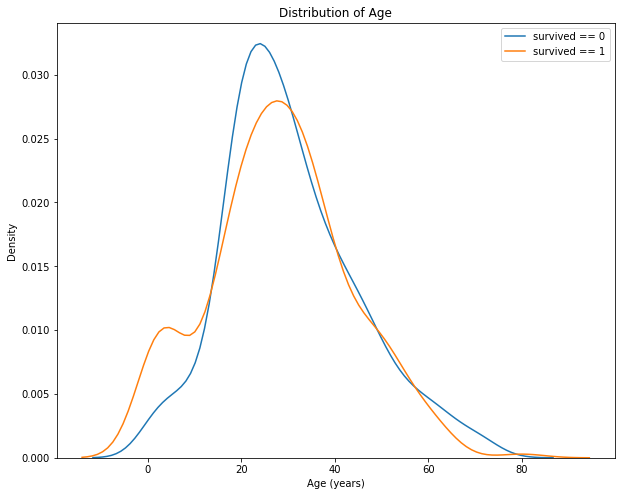

In [23]:
plt.figure(figsize = (10, 8))

df = train_df[['Survived', 'Age']]
df = df.dropna()

# KDE plot of passengers who did not survive 
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label = 'survived == 0')

# KDE plot of passengers who survived
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label = 'survived == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Age');

Although this graph is stating that children with age between 0-10 have more survival to non-survival ratio, this graph is not helping much in getting some useful information. We will examine this variable by dividing into different age groups- child, young and old. And for the null values in the age variable, we will make 'missing' class. 

In [24]:
# dividing the age variable into different classes
train_df['Age'] = train_df['Age'].fillna(200) # this is just indicating the missing values
train_df['Age'] = pd.cut(train_df['Age'], bins=[0,12,40,80, 250], labels = ['Child', 'Young', 'Old', 'Missing'])

In [25]:
temp_col = train_df.columns.values[5]
plot_count_percent_for_object(train_df, temp_col)

Now this plot gives us some useful information such as children are more likely to survive, followed by young and old. Maybe because there were limited lifeboats and they tried to save all the children first by sending them on the lifeboats with some adults. But Age variable has many missing entries (177 to be precise) and we need to impute them.   

In [ ]:
age = pd.read_csv('Data/train.csv')
train_df['Age'] = age['Age']

# mean of the age variable
age_avg = train_df['Age'].mean()
# standard deviation of the age variable 
age_std = train_df['Age'].std()

age_null_count = train_df['Age'].isnull().sum()

# list of the random age values to be filled based on the distribution of the original age variable  
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

train_df['Age'][np.isnan(train_df['Age'])] = age_null_random_list

Now, since we have imputed the missing age values, again divide the age variable into three groups- child, young and old.

In [28]:
# dividing the age variable into different classes
train_df['Age'] = pd.cut(train_df['Age'], bins=[0,12,40,80], labels = ['Child', 'Young', 'Old'])
test_df['Age'] = pd.cut(test_df['Age'], bins=[0,12,40,80], labels = ['Child', 'Young', 'Old'])

In [29]:
temp_col = train_df.columns.values[5]
plot_count_percent_for_object(train_df, temp_col)

We may infer from this plot that since there were limited lifeboats, they preferred children and old people in sending them on the lifeboats.

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family,family_status
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,A/5 21171,7.2500,NaN,S,Mr,2,NotAlone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,PC 17599,71.2833,C85,C,Mrs,2,NotAlone
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,113803,53.1000,C123,S,Mrs,2,NotAlone
4,5,0,3,"Allen, Mr. William Henry",male,Young,373450,8.0500,NaN,S,Mr,1,Alone


Passenger Id and Ticket are just random variables and they do not give any intuition for their relation with the chances of survival of a passenger. So, we would like to drop these variables. Cabin variable has more than 75% missing data, so we would want to drop this variable. Also, we have already extracted out the useful information from the Name variable, so we would drop this variable as well.  

In [31]:
drop = ['Name', 'PassengerId', 'Ticket', 'Cabin']
train_df = train_df.drop(drop, axis=1)
test_df = test_df.drop(drop, axis=1)

## Encode the categorical variable
A machine learning model unfortunately cannot deal with categorical variables, except for some models such as LightGBM. Hence, we need to find a way to encode these variables as numbers before feeding them to our model. There are many types of encoding techniques but the two main techniques are:

- Label Encoding: assign each unique class in a categorical variable with an integer, randomly. No new columns are created
- One Hot Encoding: create a new column for each unique class in a categorical variable. Each entry recieves a 1 in the column for its corresponding class and a 0 in all other new columns

The drawback of the label encoding is that it assigns arbitrary ordering to the classes of the categorical variables which do not reflect the inherent properties/information of that variable and label encoding may be misleading in this case. When we have only 2 unique classes (like male/female) for a categorical variable or if we have more than 2 unique classes and we already know the relative ordering of the classes (like, low/medium/high), then we can go with label encoding but here also, we need to ensure that the integer values assigned to these classes align with the relative order of the classes (like, low=0, medium=1 and high=2), otherwise one-hot encoding is the safe option.

The drawback of the one-hot encoding is that the number of new columns/features (dimensions of the data) can explode with the categorical variable having many unique classes because there will be a new column for each unique class in the variable. To deal with the feature exploding problem, we can use dimensionality reduction techniques like, Principal Component Analysis (PCA) after one-hot encoding.   

### Label Encoding 
In this notebook, we will implement label encoding for any categorical variable which have 2 unique classes

In [32]:
# Create a label encoder object
encoder = LabelEncoder()
encoder_count = 0

# Iterate through the columns
for col in train_df:
    if train_df[col].dtype == 'object':
        # If 2 unique classes
        if len(list(train_df[col].unique())) <= 2:
            encoder.fit(train_df[col])
            train_df[col] = encoder.transform(train_df[col])
            test_df[col] = encoder.transform(test_df[col])
            # Keep track of how many columns were label encoded
            encoder_count += 1
            
print('%d columns were label encoded.' % encoder_count)

2 columns were label encoded.


Since, sex and family_status are 2 categorical variables with 2 unique classes, they are label encoded. We can also implement label encoding with the Age variable even if it has more than 2 unique classes, because we know the relative ordering of the classes, age_old > age_young > age_child 

In [33]:
dict1 = {'Child':1, 'Young':2, 'Old':3}
train_df['Age'] = train_df['Age'].replace(dict1)
test_df['Age'] = test_df['Age'].replace(dict1)

### One-Hot Encoding 

In [34]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,family,family_status,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,2,7.2500,2,1,0,0,1,0,0,1,0,0
1,1,1,0,2,71.2833,2,1,1,0,0,0,0,0,1,0
2,1,3,0,2,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,1,0,2,53.1000,2,1,0,0,1,0,0,0,1,0
4,0,3,1,2,8.0500,1,0,0,0,1,0,0,1,0,0


In [36]:
test_df.head()

,Pclass,Sex,Age,Fare,family,family_status,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,2.0,7.8292,1,0,0,1,0,0,0,1,0,0
1,3,0,3.0,7.0000,2,1,0,0,1,0,0,0,1,0
2,2,1,3.0,9.6875,1,0,0,1,0,0,0,1,0,0
3,3,1,2.0,8.6625,1,0,0,0,1,0,0,1,0,0
4,3,0,2.0,12.2875,3,1,0,0,1,0,0,0,1,0


In [37]:
train = train_df
test = test_df

print(train.shape)
print(test.shape)

(891, 15)
(418, 14)


In [38]:
y = train['Survived']
x = train.drop('Survived', axis=1)

Data preprocessing is complete. Here x represents features and y represents labels.

# Build the Machine Learning Model
The problem that we are solving is a binary classification problem and since we are given the target variable or the labels, it is a supervised learning. There is No Free Lunch (NFL) theorem in ,achine learning which states that no algorithm is the best for the generic case and all special cases. So, to build an efficient model, we need to compare the performance of various machine learning classification algorithms. But since we have identified our solution as a supervised learning classification algorithm, we can narrow down our list of choices.

__Machine Learning Classificaton Algorithms:__
- Generalized Linear Models (GLM)
- Support Vector Machines (SVM)
- Discriminant Analysis
- Nearest Neighbors
- Naive Bayes
- Decision Trees
- Ensemble Methods

## Imports

In [39]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection

First, run the algorithms with the default parameters to get an idea about their performances on our data and then we would tune the parameters of better performing algorithms to improve their performances.

In [ ]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability = True),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier()
     
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, x,y, cv  = cv_split, return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)


In [54]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
12,GradientBoostingClassifier,0.9,0.831343,0.100674
4,LinearDiscriminantAnalysis,0.831782,0.827985,0.00320232
0,LogisticRegressionCV,0.830177,0.827612,0.429107
10,BaggingClassifier,0.933226,0.824254,0.0204202
9,AdaBoostClassifier,0.841252,0.822761,0.0848603
2,LinearSVC,0.813323,0.816045,0.0437334
11,ExtraTreesClassifier,0.943178,0.803731,0.0169101
13,RandomForestClassifier,0.931461,0.802985,0.0189078
8,DecisionTreeClassifier,0.943178,0.802612,0.00330343
1,SVC,0.841252,0.793657,0.0993717


From the above results, it can be seen that __Gradient Boosting Classifier__ has the highest test accuracy but it has a lot of __overfitting__ since its training accuracy is around 90%, while its test accuracy is only around 83.13%. So, this algorithm cannot be trusted as it is for our model in terms of its generalization ability. So, we will tune some of the better performing algorithms by searching for the best parameters for them.   

## Tuning the Model with Hyper-Parameters
We will tune our model using Parameter Grid and Grid Search CV for different algorithms.

### Grid Search for SVM

In [56]:
# grid search for svm
classifier = svm.SVC()
base_results = cross_validate(classifier, x, y, cv  = cv_split, return_train_score=True)
classifier.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'C':[0.5,1.0,2.0, 3.0],  # penalty parameter C of the error term
              'kernel':['linear', 'rbf'], # specifies the kernel type to be used in the algorithm  
              'gamma':[0.02, 0.08,0.2,1.0] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)


epoch: 1 train_score: 0.841091492776886 test_score: 0.7985074626865671
epoch: 2 train_score: 0.8443017656500803 test_score: 0.7835820895522388
epoch: 3 train_score: 0.8378812199036918 test_score: 0.8134328358208955
epoch: 4 train_score: 0.8491171749598716 test_score: 0.7761194029850746
epoch: 5 train_score: 0.8394863563402889 test_score: 0.7985074626865671
epoch: 6 train_score: 0.841091492776886 test_score: 0.8134328358208955
epoch: 7 train_score: 0.8443017656500803 test_score: 0.7835820895522388
epoch: 8 train_score: 0.8475120385232745 test_score: 0.7910447761194029
epoch: 9 train_score: 0.8459069020866774 test_score: 0.75
epoch: 10 train_score: 0.8218298555377207 test_score: 0.8283582089552238
----------
BEFORE Tuning Parameters:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

### Grid Search for Decision Trees

In [101]:
# grid search for decision trees
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = cross_validate(dtree, x, y, cv  = cv_split, return_train_score=True)
dtree.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', dtree.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,7,10,12], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,3,5,7, 10], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }


tune_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.9390048154093098 test_score: 0.7686567164179104
epoch: 2 train_score: 0.9406099518459069 test_score: 0.7985074626865671
epoch: 3 train_score: 0.9502407704654896 test_score: 0.8208955223880597
epoch: 4 train_score: 0.9454253611556982 test_score: 0.7835820895522388
epoch: 5 train_score: 0.9406099518459069 test_score: 0.7873134328358209
epoch: 6 train_score: 0.9454253611556982 test_score: 0.8283582089552238
epoch: 7 train_score: 0.9502407704654896 test_score: 0.8022388059701493
epoch: 8 train_score: 0.9454253611556982 test_score: 0.835820895522388
epoch: 9 train_score: 0.9406099518459069 test_score: 0.753731343283582
epoch: 10 train_score: 0.9341894060995185 test_score: 0.8507462686567164
----------
BEFORE Tuning Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0

### Check the Feature Importances returned by the Tuned Decision Tree

In [97]:
# train the model using tuned decision tree parameters
dtree = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, random_state= 0, splitter= 'random')
base_results = cross_validate(dtree, x, y, cv  = cv_split, return_train_score=True)
dtree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')

In [61]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

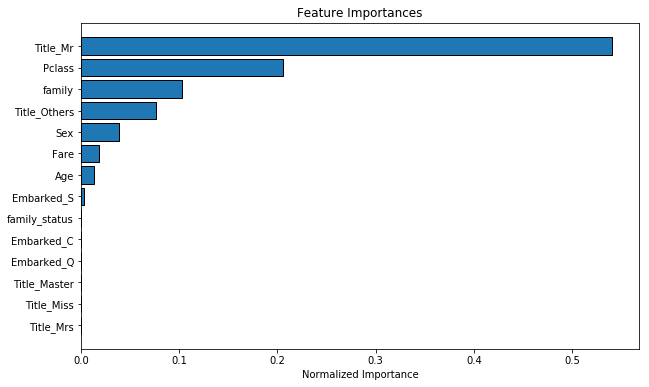

In [62]:
importance = dtree.feature_importances_
feature = x.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

### Grid Search for Bagging Classifier

In [ ]:
# grid search for bagging classifier
classifier = ensemble.BaggingClassifier()
base_results = cross_validate(classifier, x, y, cv  = cv_split, return_train_score=True)
classifier.fit(x, y)

cl1 = LogisticRegressionCV()
cl2 = tree.DecisionTreeClassifier()
cl3 = svm.LinearSVC()
cl4 = discriminant_analysis.LinearDiscriminantAnalysis()
cl5 = discriminant_analysis.QuadraticDiscriminantAnalysis()
param_grid = {'base_estimator':[cl1, cl2, cl3, cl4, cl5],
              'n_estimators':[10,13],
              #'warm_start':[False, True]
             }


tune_model = GridSearchCV(ensemble.BaggingClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)



In [67]:
# printing the results of bagging before and after tuning
epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.9245585874799358 test_score: 0.8432835820895522
epoch: 2 train_score: 0.9309791332263242 test_score: 0.832089552238806
epoch: 3 train_score: 0.9438202247191011 test_score: 0.8059701492537313
epoch: 4 train_score: 0.9390048154093098 test_score: 0.8022388059701493
epoch: 5 train_score: 0.9293739967897271 test_score: 0.7910447761194029
epoch: 6 train_score: 0.9309791332263242 test_score: 0.8395522388059702
epoch: 7 train_score: 0.9406099518459069 test_score: 0.8171641791044776
epoch: 8 train_score: 0.92776886035313 test_score: 0.8134328358208955
epoch: 9 train_score: 0.9293739967897271 test_score: 0.8022388059701493
epoch: 10 train_score: 0.9261637239165329 test_score: 0.8619402985074627
----------
BEFORE Tuning Parameters:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE Tuning Traini

### Grid Search for Adaboost

In [72]:
classifier = ensemble.AdaBoostClassifier()
base_results = cross_validate(classifier, x, y, cv  = cv_split, return_train_score=True)
classifier.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

cl1 = LogisticRegressionCV()
cl2 = tree.DecisionTreeClassifier()
cl3 = naive_bayes.GaussianNB()
param_grid = {'base_estimator':[cl1, cl2, cl3]
             }


tune_model = GridSearchCV(ensemble.AdaBoostClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.8443017656500803 test_score: 0.8134328358208955
epoch: 2 train_score: 0.85553772070626 test_score: 0.7910447761194029
epoch: 3 train_score: 0.8475120385232745 test_score: 0.8246268656716418
epoch: 4 train_score: 0.85553772070626 test_score: 0.8022388059701493
epoch: 5 train_score: 0.8330658105939005 test_score: 0.832089552238806
epoch: 6 train_score: 0.8314606741573034 test_score: 0.8246268656716418
epoch: 7 train_score: 0.8475120385232745 test_score: 0.8208955223880597
epoch: 8 train_score: 0.8346709470304976 test_score: 0.832089552238806
epoch: 9 train_score: 0.8426966292134831 test_score: 0.8208955223880597
epoch: 10 train_score: 0.8202247191011236 test_score: 0.8656716417910447
----------
BEFORE Tuning Parameters:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
BEFORE Tuning Training w/bin score mean: 84.13
BEFORE Tuning Test w/bin score mean: 82.28
----------
epoch: 0 train_score: 0.829855537

### Grid Search for Random Forest

In [84]:
classifier = ensemble.RandomForestClassifier()
base_results = cross_validate(classifier, x, y, cv  = cv_split, return_train_score=True)
classifier.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'n_estimators': [15,25,30,35],
              'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'max_depth': [2,4,6,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,7,10,12], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,3,5], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [2,3,'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }


tune_model = GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.9261637239165329 test_score: 0.8246268656716418
epoch: 2 train_score: 0.9357945425361156 test_score: 0.8059701492537313
epoch: 3 train_score: 0.9373996789727127 test_score: 0.8059701492537313
epoch: 4 train_score: 0.9341894060995185 test_score: 0.8171641791044776
epoch: 5 train_score: 0.9309791332263242 test_score: 0.7985074626865671
epoch: 6 train_score: 0.9341894060995185 test_score: 0.7910447761194029
epoch: 7 train_score: 0.9341894060995185 test_score: 0.7910447761194029
epoch: 8 train_score: 0.9341894060995185 test_score: 0.7985074626865671
epoch: 9 train_score: 0.9197431781701445 test_score: 0.8171641791044776
epoch: 10 train_score: 0.9181380417335474 test_score: 0.8544776119402985
----------
BEFORE Tuning Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_w

### Check the Feature Importances returned by the Random Forest

In [78]:
# train the model using tuned random forest parameters
random_forest = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= None, random_state= 0, min_samples_split= 10, n_estimators=25)
base_results = cross_validate(random_forest, x, y, cv  = cv_split, return_train_score=True)
random_forest.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

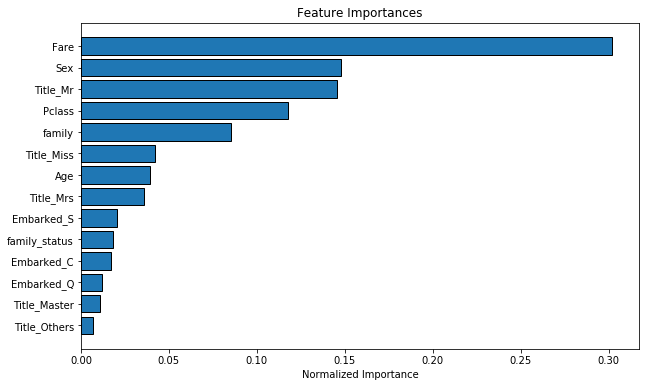

In [79]:
importance = random_forest.feature_importances_
feature = x.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

## Compare the performances of the tuned algorithms on our dataset

In [91]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability=True, C=1.0, gamma=0.02, kernel='linear'),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, random_state= 0, splitter= 'random'),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(base_estimator = LogisticRegressionCV()),
        ensemble.BaggingClassifier(base_estimator=LogisticRegressionCV(), n_estimators=10),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(criterion='entropy', min_samples_split=10, n_estimators=25, random_state=0, max_features=3)
     
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, x,y, cv  = cv_split, return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
         
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)


In [92]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
13,RandomForestClassifier,0.879615,0.835075,0.0454241
12,GradientBoostingClassifier,0.9,0.83209,0.127756
4,LinearDiscriminantAnalysis,0.831782,0.827985,0.00370688
8,DecisionTreeClassifier,0.835152,0.827985,0.00220149
0,LogisticRegressionCV,0.830177,0.827612,0.505963
9,AdaBoostClassifier,0.829535,0.827239,16.4874
10,BaggingClassifier,0.830979,0.826119,5.04712
1,SVC,0.828732,0.825746,9.32294
2,LinearSVC,0.804334,0.811194,0.0521402
11,ExtraTreesClassifier,0.943178,0.805597,0.0187139


## Conclusion
From the above table, it can be infered that the ensemble methods are not a good fit for our dataset. Although they are among the highest performers in terms of mean test accuracy, but they are facing the overfitting problem. 

Ensemble methods mainly works in two ways:

- either they sample the data multiple times and make many datasets (like bootstrapping), and on each dataset a classifier is being trained and then the combined result of each classifier is presented as output
- or on each dataset produced, a classifier is being trained with a randomly chosen subset of the features set, and then the combined result of each classifier is presented as output. 

In our case the dataset as well as the feature set, both are very small. So, while building the ensemble model, there is high probability that the different datasets produced have almost the same type of samples or since there are very few features, the different classifiers are considering the same features again and again. Due to these two reasons, the different classifiers in an ensemble model maybe having high correlations with each other. Hence, they can create the problem of overfitting, when the results of all these classifiers are combined.     

Now, since decision tree algorithm is among the top performers, we can further try to improve the performance of this algorithm with sklearn's feature selection method by exploiting the feature_importance attribute of decision trees.  

## Tune the Decision Tree Model with Feature Selection
We will use Recursive Feature Elimination (RFE) method which selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 

In [103]:
print('BEFORE RFE Training Shape Old: ', x.shape) 
print('BEFORE RFE Training Columns Old: ', x.columns.values)

print("BEFORE RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

#feature selection
dtree_rfe = feature_selection.RFECV(tree.DecisionTreeClassifier(), step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(x, y)

#transform x&y to reduced features and fit new model
X_rfe = x.columns.values[dtree_rfe.get_support()]
rfe_results = cross_validate(dtree, x[X_rfe], y, cv  = cv_split)

print('AFTER RFE Training Shape New: ', x[X_rfe].shape) 
print('AFTER RFE Training Columns New: ', X_rfe)

print("AFTER RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print('-'*10)

#tune rfe model
rfe_tune_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
rfe_tune_model.fit(x[X_rfe], y)

print('AFTER RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

BEFORE RFE Training Shape Old:  (891, 14)
BEFORE RFE Training Columns Old:  ['Pclass' 'Sex' 'Age' 'Fare' 'family' 'family_status' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'Title_Master' 'Title_Miss' 'Title_Mr'
 'Title_Mrs' 'Title_Others']
BEFORE RFE Training w/bin score mean: 94.32
BEFORE RFE Test w/bin score mean: 80.30
----------
AFTER RFE Training Shape New:  (891, 6)
AFTER RFE Training Columns New:  ['Pclass' 'Sex' 'Fare' 'family' 'Title_Mr' 'Title_Others']
AFTER RFE Training w/bin score mean: 92.94
AFTER RFE Test w/bin score mean: 82.80
----------
AFTER RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 8, 'random_state': 0, 'splitter': 'best'}
AFTER RFE Tuned Training w/bin score mean: 83.56
AFTER RFE Tuned Test w/bin score mean: 83.02
----------


## Closing Comments
After tuning the decision tree model with respect to hyper-parameters as well as feature selection, we are able to reduce the overfitting but still we are getting the mean test accuracy of around 83%. Since, our dataset is very small, the decision tree model will likely have more variance. So, instead we can use either Linear Discriminant Analysis model or Logistic Regression model as both of them have similar accuracy of around 82.7%, closer to decision trees.   